# Dataset Description

**Source :**

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption



**Data Set Information:**

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.



**Attribute Information:**

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a  dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Importing some common Packages and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import warnings
from sklearn.metrics import mean_squared_error

### Loading Dataset using pandas Package

In [2]:
Data = pd.read_csv("C:\\Users\\SS\\Downloads\\MDS Course files\\Data set\\household_power_consumption\\household_power_consumption.txt",sep=';')

C:\Users\SS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset set is in txt format and also have data separated by ';'. So, we used sep argument to make correct dataframe / tabel

In [3]:
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Checking Data Structure
-> Number of rows / instaces / enteries

-> Number of columns / features / attributes

In [4]:
print(f"Number of rows are {Data.shape[0]}. \nNumber of Columns are {Data.shape[1]}.")

Number of rows are 2075259. 
Number of Columns are 9.


## Information about columns

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Clearly from this we can see there are many features which are numbers in real but categorised as object.

So, we will change their types.

In [6]:
Data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

To change the types of the columns, First we seprate Date, Time and Other Features then we **use apply function and .to_numeric function**

In [7]:
temp1 = Data[['Date', 'Time']]
temp1.head(2)

,Date,Time
0,16/12/2006,17:24:00
1,16/12/2006,17:25:00


In [8]:
temp1[['Date']] = temp1[['Date']].apply(pd.to_datetime)
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
Date    datetime64[ns]
Time    object
dtypes: datetime64[ns](1), object(1)
memory usage: 31.7+ MB


C:\Users\SS\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [9]:
temp1.head()

,Date,Time
0,2006-12-16,17:24:00
1,2006-12-16,17:25:00
2,2006-12-16,17:26:00
3,2006-12-16,17:27:00
4,2006-12-16,17:28:00


In [10]:
temp2 = Data[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
              'Sub_metering_3']]
temp2.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0


In [11]:
temp2 = temp2.apply(pd.to_numeric, errors='coerce')
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 110.8 MB


In [12]:
Data = pd.concat([temp1,temp2],axis=1)
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Now Data is ready with correct feature types

# Checking Missing Values

In [13]:
Data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

There are 25979 instances which are empty in our Data.

In [14]:
# creating bool series True for NaN values 
bool_series = pd.isnull(Data["Voltage"])  
    
# filtering data  
# displaying data only with Voltage = NaN  
Data[bool_series]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,2006-12-21,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,2006-12-30,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,2006-12-30,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,2007-01-14,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61909,2007-01-28,17:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98254,2007-02-22,22:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98255,2007-02-22,22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142588,2007-03-25,17:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190497,2007-04-28,00:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clearly, the 25979 rows are completely empty.
Now we fill these rows using **interpolate function** using linear method

In [16]:
Data = Data.interpolate(method ='linear') 

Checking again if there left any null values. 

In [17]:
Data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Missing Values are handled

# Reseting Index
We reset 'Date' as index

In [19]:
Data.set_index('Date',inplace=True)
Data.head(4)

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0


# Data Visualization

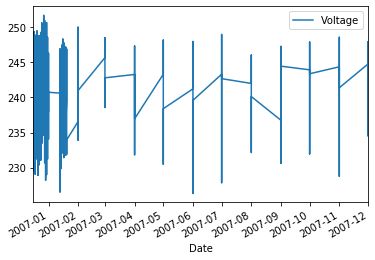

In [34]:
Data[['Voltage']].iloc[0:50000].plot()
plt.show()

Data is too large to plot in a graph. We try to plot it in separate graph of according to years.